## Dataset and Preprocessing
importing the dataset from sklearn.

ref_link: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [5]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
california_housing.target.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [7]:
## having the data and the target variable

X = california_housing.data
y = california_housing.target

## will split the data into train and testing dataset

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [8]:
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (16512, 8)
y_train shape (16512,)
X_test shape (4128, 8)
y_test shape (4128,)


In [9]:
## standardising the featues
## that would mean scaling the features in such a way that they fit the std
## normal distribution - mean(0), std_dev(1)

## this would make use of StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)




In [10]:
X_train_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
8267,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
17445,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
14265,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
2271,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


In [11]:
print(X_train_scaled.mean())

print(X_train_scaled.std())

MedInc       -6.519333e-17
HouseAge     -9.251859e-18
AveRooms     -1.981081e-16
AveBedrms    -1.707291e-16
Population   -2.151595e-19
AveOccup      4.936566e-17
Latitude      6.400995e-17
Longitude     1.753335e-15
dtype: float64
MedInc        1.00003
HouseAge      1.00003
AveRooms      1.00003
AveBedrms     1.00003
Population    1.00003
AveOccup      1.00003
Latitude      1.00003
Longitude     1.00003
dtype: float64


the output above shows that the means are near about 0.

In [12]:
## adding the columns of ones as the 'intercept'


X_train_scaled.insert(0, 'intercept', 1)

In [13]:
X_train_scaled.head()

,intercept,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,1,-0.326196,0.348490,-0.174916,-0.208365,0.768276,0.051376,-1.372811,1.272587
8267,1,-0.035843,1.618118,-0.402835,-0.128530,-0.098901,-0.117362,-0.876696,0.709162
17445,1,0.144701,-1.952710,0.088216,-0.257538,-0.449818,-0.032280,-0.460146,-0.447603
14265,1,-1.017864,0.586545,-0.600015,-0.145156,-0.007434,0.077507,-1.382172,1.232698
2271,1,-0.171488,1.142008,0.349007,0.086624,-0.485877,-0.068832,0.532084,-0.108551


## Implementing normal equation (closed form)

we take the normal linear regression equation as

*y = bX + e*

where b is the weight and e is the bias

let us say our X was of *n x d* dimensions, after adding the intercept column its dimension becomes

*n x (d + 1)*



## Implementation

now, our ultimate goal is to reduce the loss which is termed as

*sum for all datapoints((predicted output - expected output)^2)*


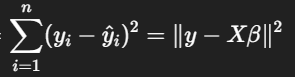


solving this equation (by derivating it to minimise and setting to zero) we get the value of beta (b)

which is given by:

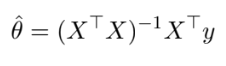


so, we'll try to implement the same equation





In [14]:
x_1 = X_train_scaled.copy()

print(x_1.head())

print(x_1.shape)

       intercept    MedInc  HouseAge  AveRooms  AveBedrms  Population  \
14196          1 -0.326196  0.348490 -0.174916  -0.208365    0.768276   
8267           1 -0.035843  1.618118 -0.402835  -0.128530   -0.098901   
17445          1  0.144701 -1.952710  0.088216  -0.257538   -0.449818   
14265          1 -1.017864  0.586545 -0.600015  -0.145156   -0.007434   
2271           1 -0.171488  1.142008  0.349007   0.086624   -0.485877   

       AveOccup  Latitude  Longitude  
14196  0.051376 -1.372811   1.272587  
8267  -0.117362 -0.876696   0.709162  
17445 -0.032280 -0.460146  -0.447603  
14265  0.077507 -1.382172   1.232698  
2271  -0.068832  0.532084  -0.108551  
(16512, 9)


In [15]:
y_1 = y_train.copy()

print(y_1.head())

print(y_1.shape)


n = y_1.shape[0]

print(n)

14196    1.030
8267     3.821
17445    1.726
14265    0.934
2271     0.965
Name: MedHouseVal, dtype: float64
(16512,)
16512


In [16]:
## had to convert the dataframe into numpy array bcz apparently you would have probs in inverse

X_mat = x_1.values
y_mat = y_1.values.reshape(-1,1)

# Normal equation
beta = np.linalg.inv(X_mat.T @ X_mat) @ (X_mat.T @ y_mat)

print(beta.shape)

(9, 1)


at this point we can implement this beta in our equation

of y = bX + e

and e was already added in X,

we'll try to see the predicted values and how much they differ using MSE


then move on to gradient descent

In [18]:


X_test_scaled.insert(0, 'intercept', 1)

In [19]:
## predicted values

p_test = X_test_scaled @ beta

print(p_test.shape)



(4128, 1)


In [20]:
## checking values by using MSE

mse1 = np.mean((p_test - y_test.values.reshape(-1,1))**2)
print(mse1)




0.5558915986952442


In [21]:
## RMSE (root of MSE?)

rmse1 = np.sqrt(mse1)
print(rmse1)

0.7455813830127763


In [22]:
## r_squared

## r_squared = 1 - (SS res)/(SS tot)

y_test_vec = y_test.values.reshape(-1,1)  # shape (4128,1)
ss_res = np.sum((y_test_vec - p_test)**2)
ss_tot = np.sum((y_test_vec - np.mean(y_test_vec))**2)
r2_test = 1 - (ss_res / ss_tot)


print(r2_test)

0    0.575788
dtype: float64


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


ofc as expected huge errors popping up, so moving on to gradient descent implementation


## Gradient Descent
so technically we are given to do the following steps




1.   Implementing the MSE

      Okay so this would require us the equation:

      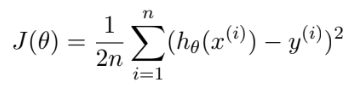
2. Implementing Gradient Descent updates

  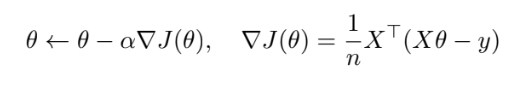

  We'll make use of these equations
  
  and we will create a function that has the following parameters:

    1. learning rate

    2. number of iterations
    
    3. a threshold loss to control the gradient descent (early stopping tolerance)






3. Track and store losses on every iteration



In [23]:

n_samples, n_features = X_mat.shape

alpha = 0.01
iter = 10000
tol = 1e-6

beta = np.zeros((n_features, 1))
loss_arr = []

for i in range(iter):
    ## Predictions
    y_pred = X_mat @ beta

    ## Compute MSE
    loss = np.mean((y_mat - y_pred)**2)
    loss_arr.append(loss)

    if i % 1000 == 0:
        print(f"Loss at iteration {i}: {loss}")

    ## early stopping
    if i > 0 and abs(loss_arr[-2] - loss) < tol:
        print(f"Early stopping at iteration {i}")
        break

    gradient = (1 / n_samples) * (X_mat.T @ (y_pred - y_mat))

    beta = beta - alpha * gradient


print("Final loss:", loss_arr[-1])


Loss at iteration 0: 5.629742323103131
Loss at iteration 1000: 0.5476781773713636
Loss at iteration 2000: 0.5246053811887791
Loss at iteration 3000: 0.5195922259419277
Early stopping at iteration 3570
Final loss: 0.5187257383502103


In [24]:

X_test_np  = X_test_scaled.to_numpy()

y_test_np  = y_test.values.reshape(-1,1)

y_pred_test  = (X_test_np  @ beta).reshape(-1,1)


mse_test = np.mean((y_test_np - y_pred_test)**2)
rmse_test = np.sqrt(mse_test)
r2_test = 1 - np.sum((y_test_np - y_pred_test)**2) / np.sum((y_test_np - np.mean(y_test_np))**2)

print("Test MSE:", mse_test)
print("Test RMSE:", rmse_test)
print("Test R²:", r2_test)

Test MSE: 0.5554431888816946
Test RMSE: 0.7452806108317153
Test R²: 0.5761298967690799


## Fitting the sklearn model

now we will use the sklearn library to compare our results

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()


model = LinearRegression(fit_intercept=False)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", mse**0.5)
print("R²:", r2)

MSE: 0.555891598695244
RMSE: 0.7455813830127761
R²: 0.5757877060324511


# Comparing the results

## Normal Form
MSE: 0.5554431888816946

RMSE:0.7452806108317153

R_squared:0.57613

## Gradient Descent

MSE: 0.5562458310337424

RMSE: 0.745818899622249

R²: 0.5755173840609289

## SkLearn
MSE:0.555891598695244

RMSE:0.7455813830127761

R_squared:0.5757877060324511


## Plotting / Visualisation

Plot training loss (MSE) against iteration number for gradient
descent. Include curves for different learning rates and for unscaled vs scaled features to show the effect of scaling.


Plot validation loss


Gradient/loss surface visualization

### Iterations vs loss

Plotting training loss for every iteration, as we stored them in loss_arr


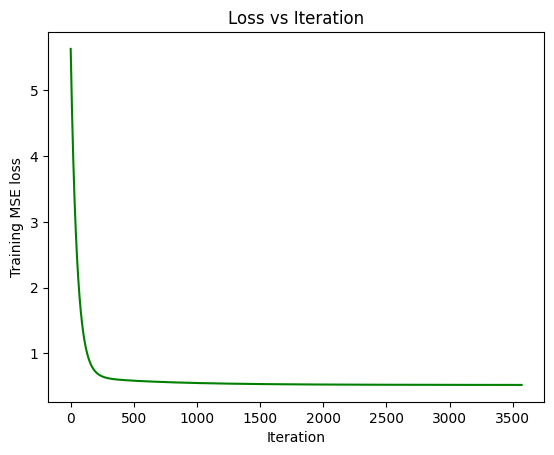

In [26]:
import matplotlib.pyplot as plt

plt.plot(loss_arr, color='green')
plt.xlabel("Iteration")
plt.ylabel("Training MSE loss")
plt.title("Loss vs Iteration")
plt.show()

## Different Learning Rates


now we will try to do this process for learning rates such as:

alphas = [0.001, 0.01, 0.1]

Loss at iteration 0: 5.629742323103131
Loss at iteration 1000: 1.3099993145669517
Loss at iteration 2000: 0.713803586634497
Loss at iteration 3000: 0.6194622095165798
Loss at iteration 4000: 0.5954780621918455
Loss at iteration 5000: 0.582881751862587
Loss at iteration 6000: 0.5732741046884782
Loss at iteration 7000: 0.5652559494144229
Loss at iteration 8000: 0.5584474427683391
Loss at iteration 9000: 0.5526449873626179
Loss at iteration 0: 5.629742323103131
Loss at iteration 1000: 0.5476781773713636
Loss at iteration 2000: 0.5246053811887791
Loss at iteration 3000: 0.5195922259419277
Early stopping at iteration 3570
Loss at iteration 0: 5.629742323103131
Early stopping at iteration 542


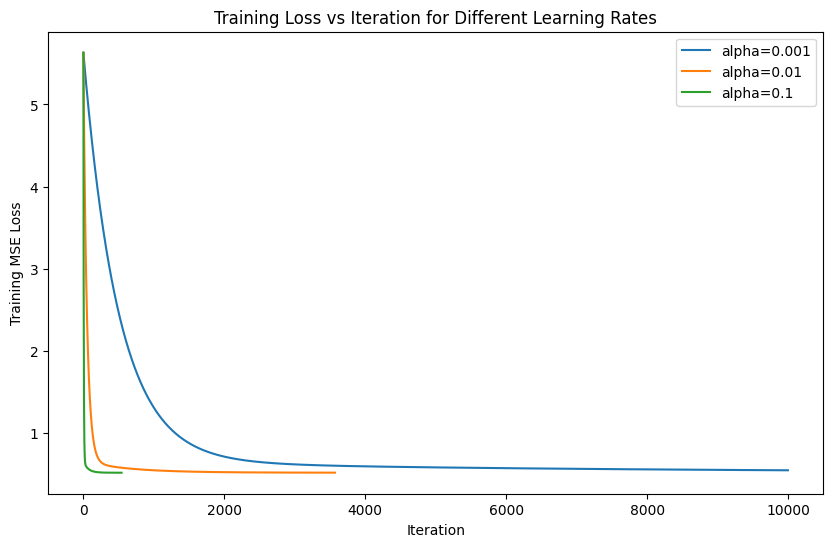

In [27]:

n_samples, n_features = X_mat.shape


alphas = [0.001, 0.01, 0.1]
loss_dict = {}
iter = 10000
tol = 1e-6




for alpha in alphas :
  beta = np.zeros((n_features, 1))
  loss_arr = []
  for i in range(iter):
    ## Predictions
      y_pred = X_mat @ beta

    ## Compute MSE
      loss = np.mean((y_mat - y_pred)**2)
      loss_arr.append(loss)

      if i % 1000 == 0:
          print(f"Loss at iteration {i}: {loss}")

    ## early stopping
      if i > 0 and abs(loss_arr[-2] - loss) < tol:
          print(f"Early stopping at iteration {i}")
          break

      gradient = (1 / n_samples) * (X_mat.T @ (y_pred - y_mat))

      beta = beta - alpha * gradient
  loss_dict[alpha] = loss_arr



plt.figure(figsize=(10,6))

for alpha, losses in loss_dict.items():
    plt.plot(losses, label=f"alpha={alpha}")

plt.xlabel("Iteration")
plt.ylabel("Training MSE Loss")
plt.title("Training Loss vs Iteration for Different Learning Rates")
plt.legend()
plt.show()
